### Nama : Anisa Fikriani
### Kode Peserta : PYTN-KS04-002


# Final Project 1
## Perkenalan
Dataset yang kami gunakan yaitu Uber and Lyft Dataset Boston, MA yang berisi record data perjalanan taksi uber dan lyft di Boston, MA. Dataset ini terdiri dari 57 kolom dan 693.071 data. Dataset diperoleh dari kaggle.

Pada final project 1 ini kami akan membuat prediksi harga taksi Uber berdasarkan variabel cab_type, distance, surge_multiplier, dan name. 

Variabel dependennya yaitu price dan variabel independennya yaitu cab_type, distance, surge_multiplier, dan name.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Pustaka

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocess
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder, RobustScaler, OneHotEncoder

#model_selection
from sklearn.model_selection import train_test_split

#import the necessary modelling algos.
from sklearn.linear_model import LinearRegression

#evalution
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

## Data Loading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ProjekStudi1_RegresiLinear/rideshare_kaggle.csv")

In [ ]:
df.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


**Interpretasi** :
Dataset diatas memiliki 57 atribut

### Cek Type Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Interpretasi** : Dataset diatas terdiri dari column dengan type float sebanyak 29, int sebanyak 17, dan object sebanyak 11.

## Cleaning Dataset

```
# Ini diformat sebagai kode
```



In [ ]:
df.shape

(693071, 57)

In [ ]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

Cek apakah ada nilai yang terduplikasi dalam dataframe kita dengan **duplicated()**.

In [ ]:
df.duplicated().sum()

0

'0', artinya Tidak ada nilai yang terduplikat.

Cek apakah ada nilai null dalam dataframe kita atau tidak dengan **isna()**.

In [ ]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Pada kolom 'price' terdapat nilai null sebanyak 55095, lakukan **dropna()** untuk menghapusnya.

In [ ]:
df['price'] = df['price'].fillna(df['price'].mean())
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Sekarang dataframe kita sudah bersih dari nilai null dan duplikat.

Selanjutnya kita perlu **menghapus nilai outlier** dari dataframe kita agar pemodelan nantinya menghasilkan score yang terbaik.

In [ ]:
Qp12 = df['price'].quantile(0.25)
Qp32 = df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [ ]:
df[df['price']>(Qp32+(1.5*IQRp))].head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
469,fa6e092f-5562-49ef-916c-92d8148111ee,1.543627e+09,1,1,12,2018-12-01 01:13:02,America/New_York,Boston University,Theatre District,Lyft,...,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1543600800
639,4c1f503c-2411-4c59-b416-c9831f3da44b,1.543557e+09,5,30,11,2018-11-30 05:42:57,America/New_York,Financial District,Fenway,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600


In [ ]:
print('Size before removing :',df.shape)
df= df[~((df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',df.shape)

Size before removing : (693071, 57)
Size after removing : (685089, 57)


# EDA (Exploratory Data Analysis)

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.850890e+05,685089.000000,685089.000000,685089.000000,685089.000000,685089.000000,685089.000000,685089.000000,685089.000000,685089.000000,...,685089.000000,6.850890e+05,685089.000000,6.850890e+05,685089.000000,6.850890e+05,685089.000000,6.850890e+05,685089.000000,6.850890e+05
mean,1.544046e+09,11.618977,17.793615,11.586746,16.177718,2.167018,1.010825,42.338157,-71.066146,39.584269,...,0.037371,1.544044e+09,33.457385,1.544042e+09,45.261759,1.544047e+09,29.730563,1.544048e+09,41.997851,1.544048e+09
std,6.891733e+05,6.948073,9.981981,0.492418,8.281522,1.116552,0.078060,0.047855,0.020301,6.727263,...,0.055213,6.911886e+05,6.468182,6.901813e+05,5.645938,6.901215e+05,7.111434,6.871727e+05,6.937761,6.910616e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.500000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,15.500000,2.140000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.000000,2.880000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,42.000000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


### Rata-rata Harga Tiap Produk 

In [ ]:
df.groupby('name')['price'].mean()

name
Black           20.479991
Black SUV       29.807035
Lux             17.669474
Lux Black       22.656590
Lux Black XL    30.500287
Lyft             9.610885
Lyft XL         15.261537
Shared           6.029893
Taxi            16.545125
UberPool         8.751888
UberX            9.764453
UberXL          15.637989
WAV              9.764398
Name: price, dtype: float64

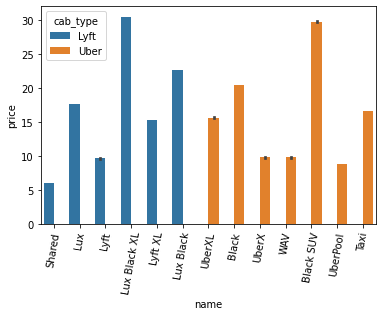

In [ ]:
plot = sns.barplot(y='price',x='name',data=df, hue='cab_type')
plot=plt.setp(plot.get_xticklabels(), rotation=80)

Menurut dataset:
- Produk Lyft, Lux Black XL adalah produk dengan harga perjalanan termahal.
- Produk Lyft, Shared adalah produk dengan harga perjalanan termurah.


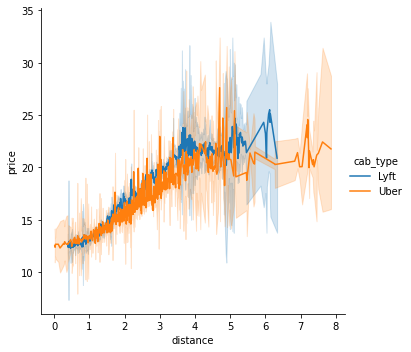

In [ ]:
sns.relplot(kind = 'line', x='distance', y='price', data=df, hue='cab_type')

Berdasarkan grafik diatas dapat dilihat bahwa semakin besar jarak yang ditempuh oleh taksi milik Uber dan Lyft maka semakin besar pula tarif perjalanan. Taksi milik Lyft memiliki tarif lebih tinggi dibandingkan Uber walaupun jarak yang ditempuh tidak terlalu besar daripada Uber, hal ini dapat dikarenakan jenis taksi yang dipakai oleh Lyft.

Selanjutnya mari kita lihat apakah benar jenis taksi yang dimiliki oleh Uber dan Lyft mempengaruhi tarif/harga perjalanan?

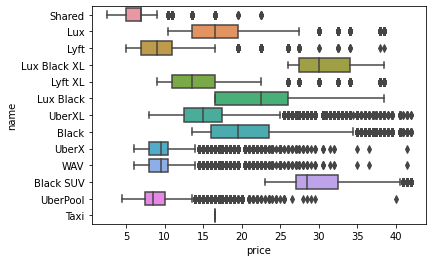

In [ ]:
sns.boxplot(x='price', y='name', data=df, orient='h')

Berdasarkan grafik diatas terbukti bahwa jenis taksi yang dimiliki Uber dan Lyft mempengaruhi tarif/harga perjalanan yang akan dikenakan kepada penumpang.

Lalu, apakah lonjakan pesanan terhadap jenis taksi yang dimiliki oleh Uber dan Lyft mempengaruhi tarif perjalanan?

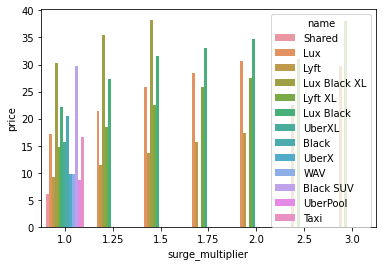

In [ ]:
sns.barplot(x='surge_multiplier', y='price', hue='name', data=df, ci=None)

Berdasarkan grafik diatas dapat dilihat bahwa lonjakan pesanan sangat mempengaruhi tarif pada jenis taksi yang dimiliki oleh Lyft seperti Lux, Lyft, Lux Black XL, Lyft XL, Lux Black. Serta jenis taksi Lyft yang paling terpengaruh oleh lonjakan pesanan adalah Lux Black XL.

**Rata-rata harga perjalanan Uber dan Lyft**

In [ ]:
u_price = df[(df.cab_type=='Uber')]['price']
l_price = df[(df.cab_type=='Lyft')]['price']

# Kalkulasi Populasi Mean
popul_uber_mean = u_price.mean()
print("Mean Uber: ",popul_uber_mean)

popul_lyft_mean = l_price.mean()
print("Mean Lyft: ",popul_lyft_mean)

Mean Uber:  15.763000799421505
Mean Lyft:  16.70636716194903


### Price berdasarkan jarak Source dengan Destination

In [ ]:
location_price = df.pivot_table(values='price',
                       index=['cab_type'],
                       columns=['source','destination'],
                       aggfunc=np.sum,
                       fill_value=0)
location_price.loc['mean'] = location_price.mean()
location_price = location_price.T
location_price = location_price.reset_index(drop=False)

location_price.head(2)

cab_type,source,destination,Lyft,Uber,mean
0,Back Bay,Boston University,60237.5,72129.979494,66183.739747
1,Back Bay,Fenway,59419.0,70254.889243,64836.944622


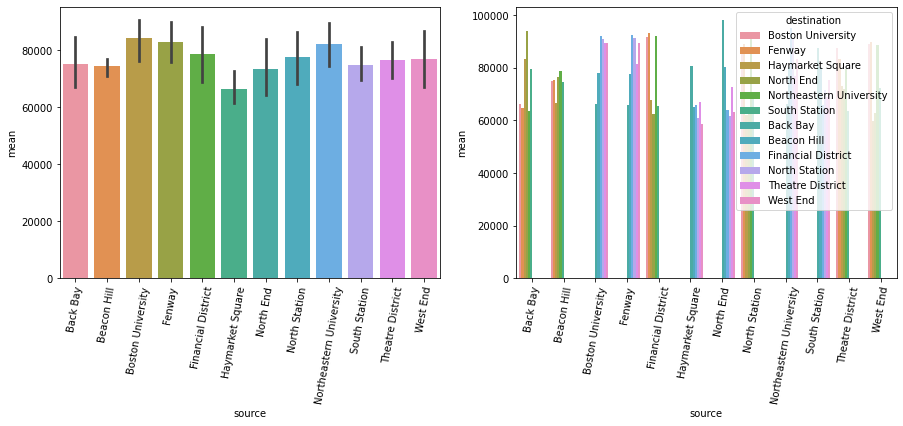

In [ ]:
f= plt.figure(figsize=(15,5))

ax1=f.add_subplot(121)
plot = sns.barplot(x='source', y='mean',data=location_price, ax=ax1)
plot= plt.setp(plot.get_xticklabels(), rotation=80)

ax2=f.add_subplot(122)
plot = sns.barplot(x='source', y='mean',data=location_price, hue='destination', ax=ax2)
plot= plt.setp(plot.get_xticklabels(), rotation=80)

Menurut dataset:
- Perjalanan dengan harga termahal adalah dari Financial District ke Boston University 
- Perjalanan dengan harga termurah adalah dari Haymarket Square ke North Station

# New DataFrame

In [ ]:
new_column = ['hour', 'day', 'month',
              'source', 'destination',
              'cab_type', 'name', 'distance',
              'surge_multiplier', 'latitude', 'longitude',
              'temperature', 'short_summary', 'humidity',
              'visibility', 'price', 'temperature']
df_new= df[new_column]
df_new.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,humidity,visibility,price,temperature
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,0.68,10.000,5.0,42.34
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,42.2148,-71.033,43.58,Rain,0.94,4.786,11.0,43.58
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,42.2148,-71.033,38.33,Clear,0.75,10.000,7.0,38.33
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,42.2148,-71.033,34.38,Clear,0.73,10.000,26.0,34.38
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,0.70,10.000,9.0,37.44


In [ ]:
df_new.shape

(685089, 17)

# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df_new['source'] = label.fit_transform(df_new['source'])
df_new['destination'] = label.fit_transform(df_new['destination'])
df_new['cab_type'] = label.fit_transform(df_new['cab_type'])
df_new['name'] = label.fit_transform(df_new['name'])
df_new['short_summary'] = label.fit_transform(df_new['short_summary'])

In [ ]:
df_new.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,humidity,visibility,price,temperature
0,9,16,12,5,7,0,7,0.44,1.0,42.2148,-71.033,42.34,4,0.68,10.000,5.0,42.34
1,2,27,11,5,7,0,2,0.44,1.0,42.2148,-71.033,43.58,8,0.94,4.786,11.0,43.58
2,1,28,11,5,7,0,5,0.44,1.0,42.2148,-71.033,38.33,0,0.75,10.000,7.0,38.33
3,4,30,11,5,7,0,4,0.44,1.0,42.2148,-71.033,34.38,0,0.73,10.000,26.0,34.38
4,3,29,11,5,7,0,6,0.44,1.0,42.2148,-71.033,37.44,6,0.70,10.000,9.0,37.44


In [ ]:
# plt.figure(figsize=(30,20))
# sns.heatmap(df.corr(),annot=True)

<b>Dari Heatmap diatas kita dapat lihat bahwa kolom yang berkorelasi paling tinggi dengan price dan unique kolom nya tepat (tidak terlalu banyak ) ada 5 yaitu : cab_type, name, distance, surge_multiplier dan price<b>

In [ ]:
new_column = ['cab_type', 'name', 'distance', 'surge_multiplier', 'price']
df_final= df[new_column]
df_final.head()

,cab_type,name,distance,surge_multiplier,price
0,Lyft,Shared,0.44,1.0,5.0
1,Lyft,Lux,0.44,1.0,11.0
2,Lyft,Lyft,0.44,1.0,7.0
3,Lyft,Lux Black XL,0.44,1.0,26.0
4,Lyft,Lyft XL,0.44,1.0,9.0


In [ ]:
df_final_encoded = pd.get_dummies(df_final)
df_final_encoded.head()

,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,5.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.44,1.0,11.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.44,1.0,7.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.44,1.0,26.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.44,1.0,9.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
datax = df_final_encoded.drop(['price'],axis=1)

## Linear Regression

In [ ]:
X = scaler.fit_transform(datax)
y = df_final_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((548071, 17), (137018, 17), (548071,), (137018,))

In [ ]:
linear = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)

In [ ]:
linear.score(X_test,y_test)

0.9231932660005707

In [ ]:
linear.score(X_train, y_train)

0.9229809548908261

In [ ]:
data_model = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_model.head()

,Actual,Predicted
602351,8.000000,6.613587
148889,11.000000,11.951383
213949,16.545125,16.792449
67197,22.500000,21.232186
104016,16.500000,16.861653


## Model Inference

In [ ]:
X_new = {'cab_type_Lyft':[1,2,3], 'cab_type_Uber':[1,2,3], 'distance':[1,2,3], 'surge_multiplier':[1,2,3], 'name_Shared':[0,1,0], 'name_Black':[0,1,0],	'name_Black_SUV':[0,1,0],	'name_Lux':[0,1,0],	'name_Lux_Black':[0,1,0],	'name_Lux_Black_XL':[0,1,0],	'name_Lyft':[0,1,0],	'name_Lyft_XL':[0,1,0],	'name_Shared':[0,1,0],	'name_Taxi':[0,1,0],	'name_UberPool':[0,1,0],	'name_UberX':[0,1,0],	'name_UberXL':[0,1,0],	'name_WAV':[0,1,0]}
X_new = pd.DataFrame(X_new)

In [ ]:
y_pred1 = linear.predict(X_new)
print('Prediksi Tarif yaitu: ')
print(y_pred1)

Prediksi Tarif yaitu: 
[-1.29968737e+08  3.50103987e+09 -3.89906244e+08]


## Visualisasi Model

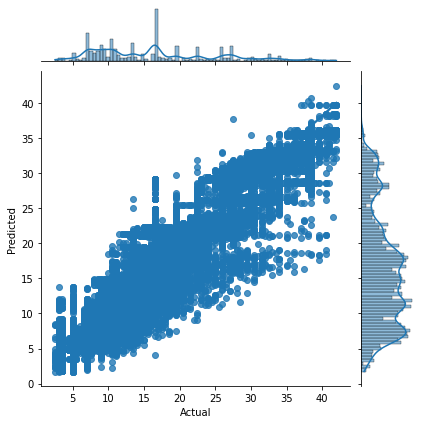

In [ ]:
sns.jointplot(x='Actual', y='Predicted', data=data_model, kind='reg')

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(linear)
 
# Load the pickled model
model_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
model_from_pickle.predict(X_test)

array([ 6.61358727, 11.95138253, 16.79244889, ..., 19.1765088 ,
       21.61966981, 21.7394246 ])

In [ ]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(linear, 'filename.pkl')
 
# Load the model from the file
model_from_joblib = joblib.load('filename.pkl')
 
# Use the loaded model to make predictions
model_from_joblib.predict(X_test)

array([ 6.61358727, 11.95138253, 16.79244889, ..., 19.1765088 ,
       21.61966981, 21.7394246 ])